# Project-2 EDA

## Цель:
Подготовить датасет для выявления и анализа факторов, влияющих на успеваемость по математике и раннего выявления группы риска.

## Задачи:
1. Первичная обработка данных.
2. Оценка распределения числовых переменных, устранение выбросов.
3. Преобразование данных.
4. Корреляционный анализ количественных переменных, отбор некоррелирующих переменных.
5. Отбор номинативных переменных, влияющих на оценку.

## Последовательность работ
1. Загрузка библиотек.
2. Чтение файла.
3. Замена некорректных значение на None.
4. Удаление строк с отсутствующим значением score.
5. Выявление и удаление коррелирующих полей.
6. Выявление и удаление выбросов в количественных полях.
7. Выявление и удаление категориальных полей, не влияющих на оценку.

# Initialising

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [3]:
df = pd.read_csv('stud_math.csv')

# Cleaning

Посмотрим размер массива

In [39]:
df.shape

(352, 26)

Посмотрим разброс количественных полей

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Проверяем пустые значения в поле score

In [8]:
len(df[df.score.isnull()])

6

Удалим строки с пустым значением score

In [10]:
df.dropna(subset=['score'], inplace=True)

Посмотрим на распределение оценок

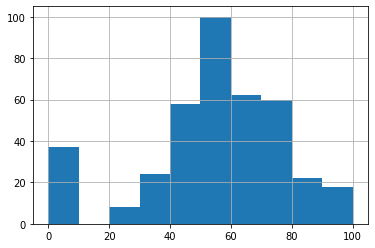

In [11]:
df.score.hist()

Нулевые значения в поле score не удаляем, трактуем их как валидные оценки. Например студент не явился на экзамен или имеет нулевые знания.

In [12]:
# удаляем строки с нулевым значением score
# кривая имеет приблизительно колоколообразную форму, но в районе 0 имеем выброс
# вероятно, 0 обозначены не реальные оценки, а отсутствие значения
# удалим их
df = df[df.score != 0]

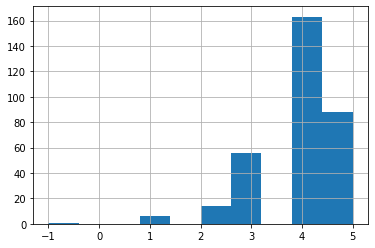

In [13]:
# проверим распределение famrel
df.famrel.hist()

In [14]:
df.famrel.value_counts()

 4.0    163
 5.0     88
 3.0     56
 2.0     14
 1.0      6
-1.0      1
Name: famrel, dtype: int64

In [15]:
# имеем отрицательное значение
# область значений famrel от 1 до 5 включительно
# удалим отрицательное значение
df.famrel = df.famrel.apply(lambda x: x if x > 0 else None)

In [16]:
# проверяем корреляцию между численными показателям >0.6
corr = df.corr()
for row in range(len(corr)):
    for col in range(row):
        val = corr.iloc[row, col]
        if abs(val) > 0.6:
            print(corr.columns[col], corr.index[row], val)

studytime studytime, granular -0.9999999999999968


In [17]:
# studytime & 'studytime, granular' отрицательно коррелируют полностью
# удаляем избыточность
df.drop(columns='studytime, granular', inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000295A746FD88>,
      dtype=object)

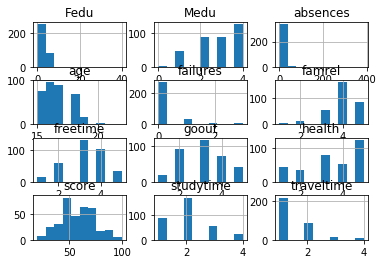

In [18]:
# смотрим распределение по всем числовым полям
df.hist()

In [19]:
# выбросы в полях Fedu, Medu, absences

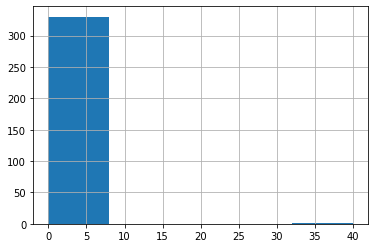

In [20]:
# анализируем Fedu
df.Fedu.hist(bins=5)

In [21]:
df.Fedu.value_counts()

2.0     94
3.0     89
4.0     80
1.0     65
0.0      2
40.0     1
Name: Fedu, dtype: int64

In [22]:
# 40 находится за границами области значений
# убираем выброс
df.Fedu = df.Fedu.apply(lambda x: x if x in range(5) else None)

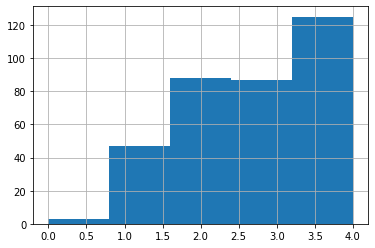

In [23]:
# анализируем Medu
df.Medu.hist(bins=5)

In [24]:
df.Medu.value_counts()

4.0    125
2.0     88
3.0     87
1.0     47
0.0      3
Name: Medu, dtype: int64

In [25]:
# все нормально
# разрыв на общем график распределений по всему набору данных связан с неподходящим для этого поля значением bin

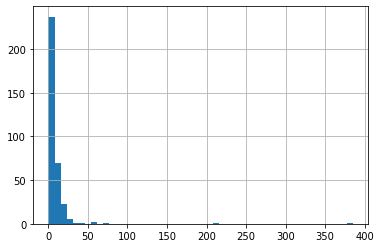

In [26]:
# анализируем absences
# увеличим параметр bins для наглядности
df.absences.hist(bins=50)

In [27]:
df.absences.value_counts()

0.0      74
2.0      60
4.0      52
6.0      30
8.0      20
10.0     17
12.0     12
14.0     12
3.0       7
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
22.0      3
9.0       3
1.0       3
15.0      2
13.0      2
11.0      2
25.0      1
54.0      1
385.0     1
26.0      1
56.0      1
24.0      1
212.0     1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
23.0      1
17.0      1
28.0      1
Name: absences, dtype: int64

In [28]:
# нам не известно, насколько реально пропустить более 100 занятий, реальные ли это данные или нет
# в целом кривая распределения имеет форму полуколокола
# визуально значения более 50 не укладываются в эту форму
# очистим их
df.absences = df.absences.apply(lambda x: x if x < 50 else None)

In [29]:
# функция для быстрого вывода информации о количественном поле
def field_info(col):
    print(df[col].describe(), '\n')
    print(df[col].value_counts())
    df[col].hist()

count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64 

16    96
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64


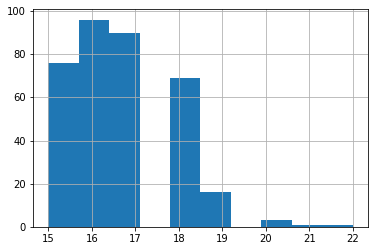

In [30]:
# здесь перебираем вручную поля для более детального изучения
field_info('age')

In [31]:
# категориальных полей много, чтобы вручную их не перебирать сделаем цикл
for name, data in df.iteritems():
    if data.dtypes == 'object':
        print('name:', name)
        print('Nones:', len(df[df[name].isnull()]))
        print(data.value_counts())
        print('total:', data.value_counts().sum(), '\n')

name: school
Nones: 0
GP    311
MS     41
Name: school, dtype: int64
total: 352 

name: sex
Nones: 0
F    182
M    170
Name: sex, dtype: int64
total: 352 

name: address
Nones: 14
U    265
R     73
Name: address, dtype: int64
total: 338 

name: famsize
Nones: 24
GT3    228
LE3    100
Name: famsize, dtype: int64
total: 328 

name: Pstatus
Nones: 41
T    277
A     34
Name: Pstatus, dtype: int64
total: 311 

name: Mjob
Nones: 17
other       115
services     90
teacher      51
at_home      49
health       30
Name: Mjob, dtype: int64
total: 335 

name: Fjob
Nones: 32
other       176
services     89
teacher      26
health       15
at_home      14
Name: Fjob, dtype: int64
total: 320 

name: reason
Nones: 15
course        119
reputation     96
home           89
other          33
Name: reason, dtype: int64
total: 337 

name: guardian
Nones: 29
mother    225
father     78
other      20
Name: guardian, dtype: int64
total: 323 

name: schoolsup
Nones: 9
no     295
yes     48
Name: schoolsup, dtype

In [32]:
# некорректных значений в категориальных полях не обнаружено
# все поля имеют 300+ корректно заполненных значений, что при общей длине очищенного массива 352
# меня устраивает

# Analysis

Посмотрим еще раз на корреляции и распределения

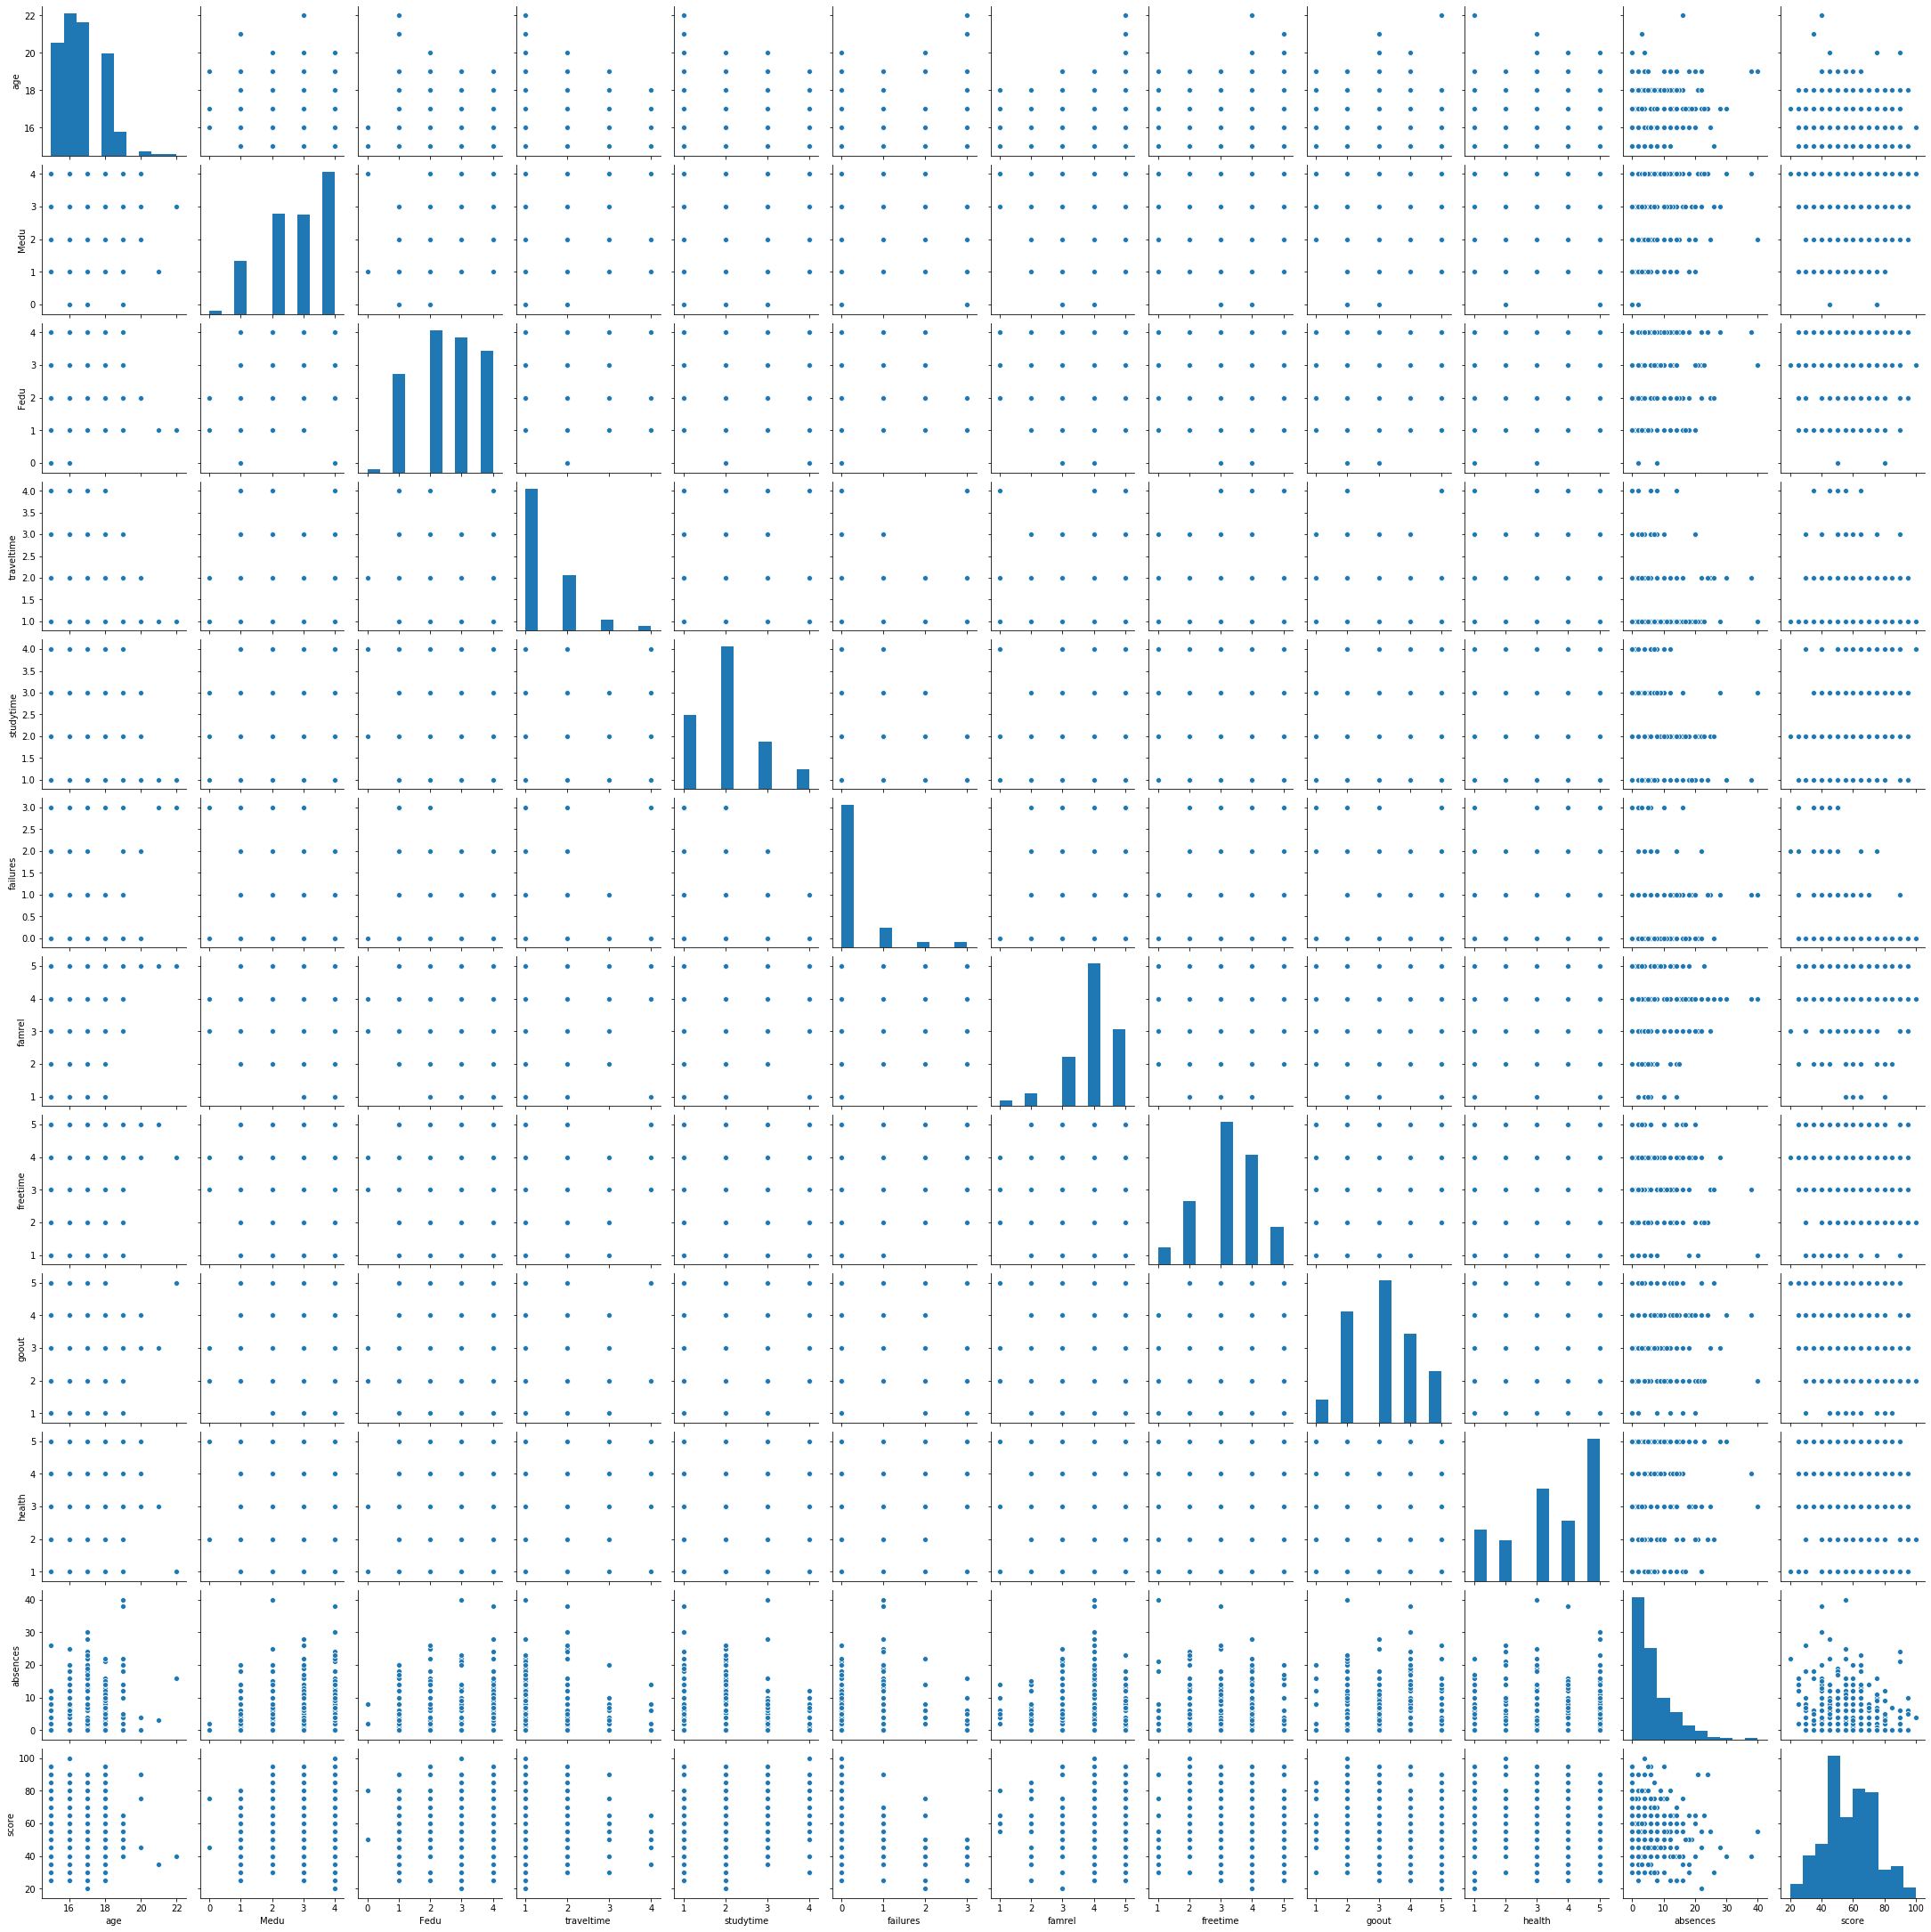

In [33]:
sns.pairplot(df)

Визуально выборосов и корреляций не наблюдается

## посмотрим на зависимость оценки от категориальных данных

In [34]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

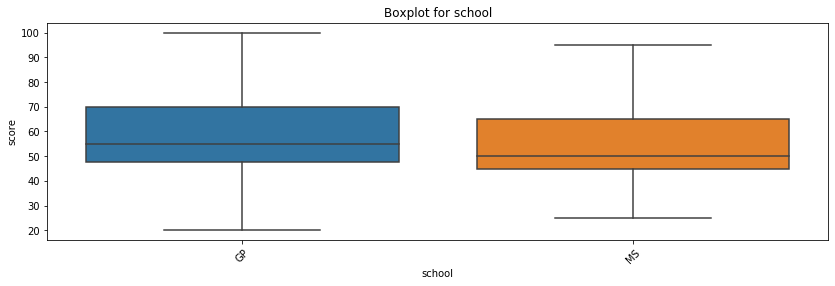

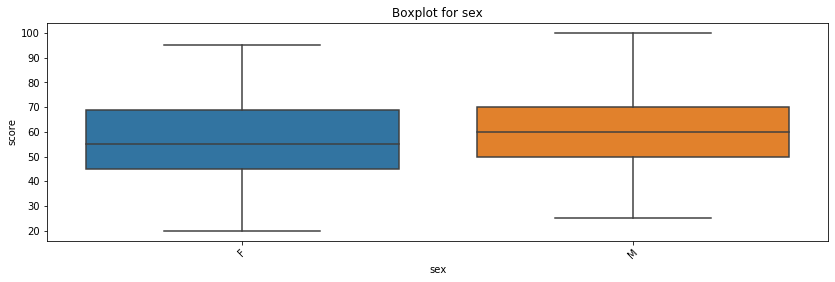

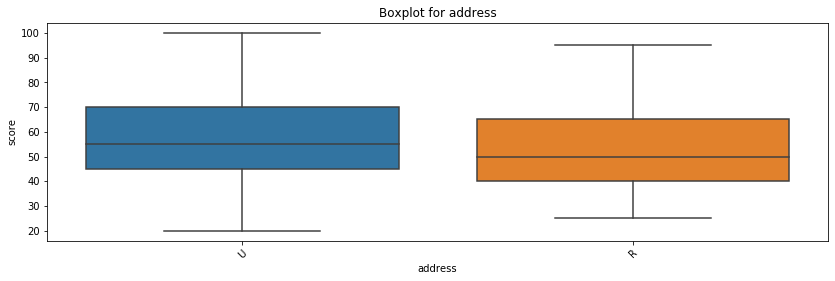

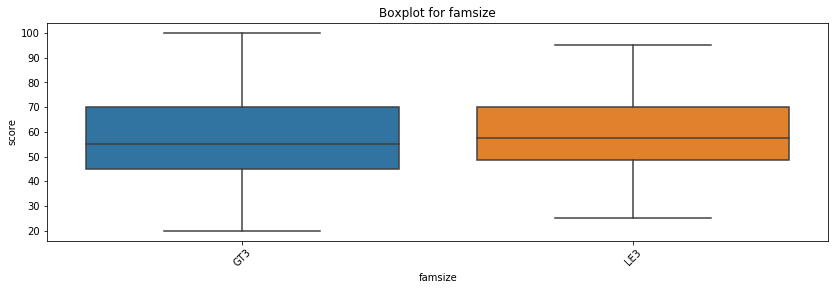

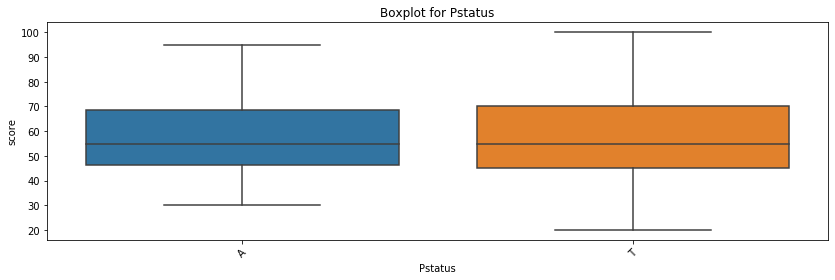

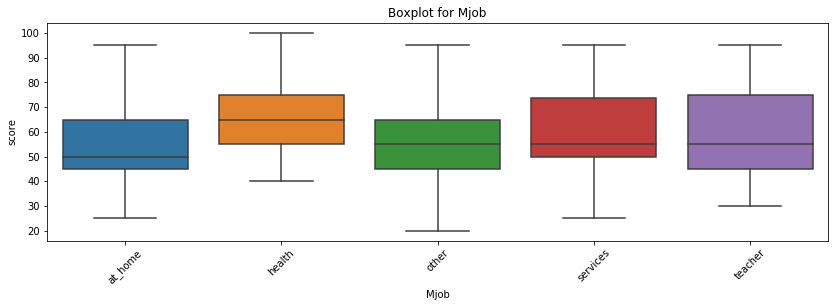

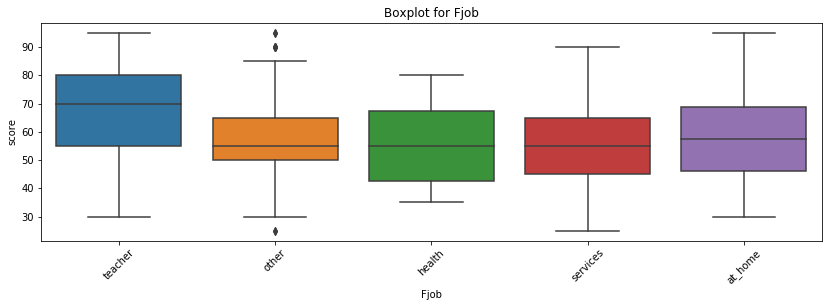

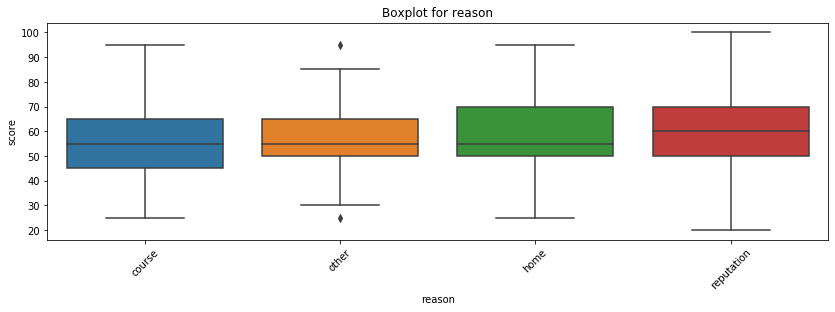

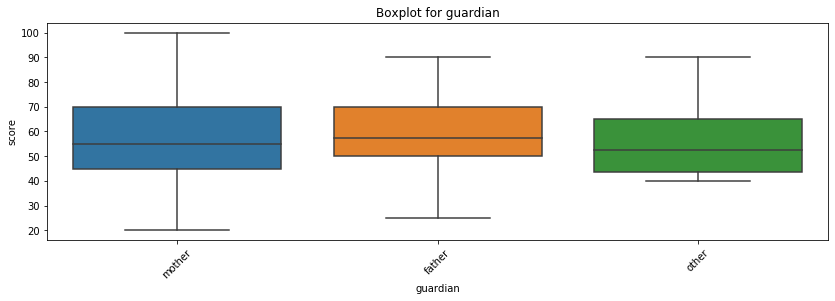

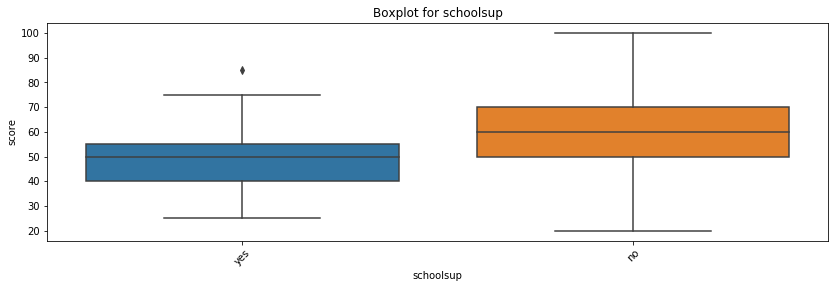

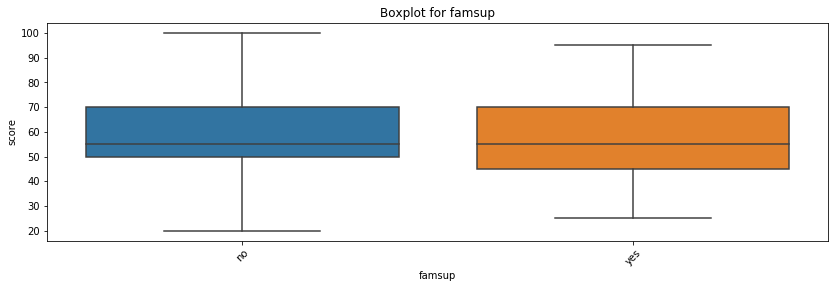

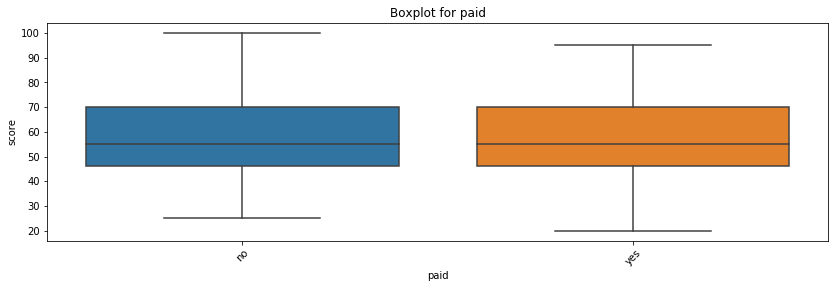

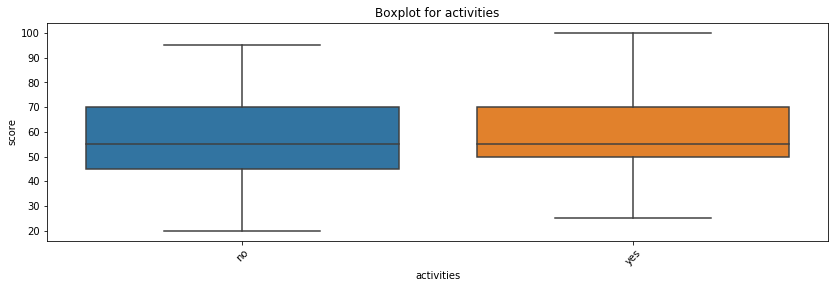

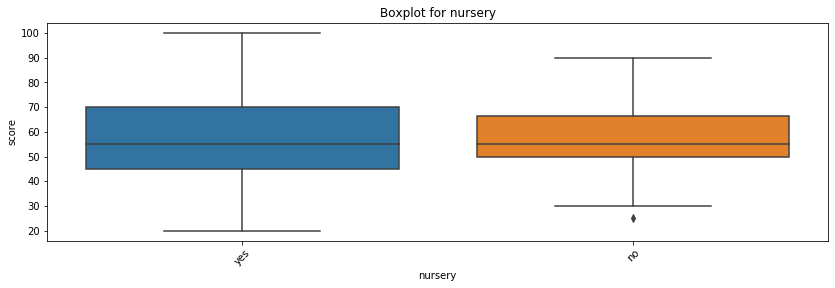

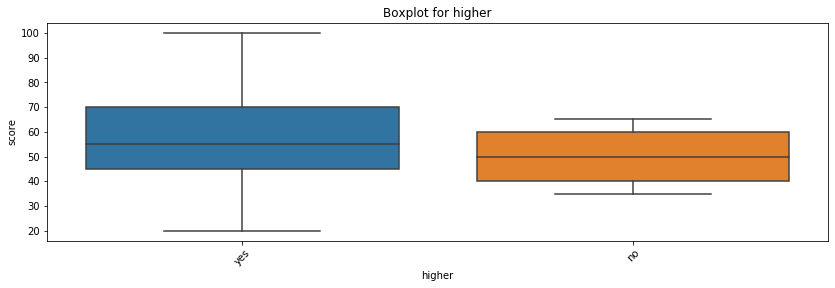

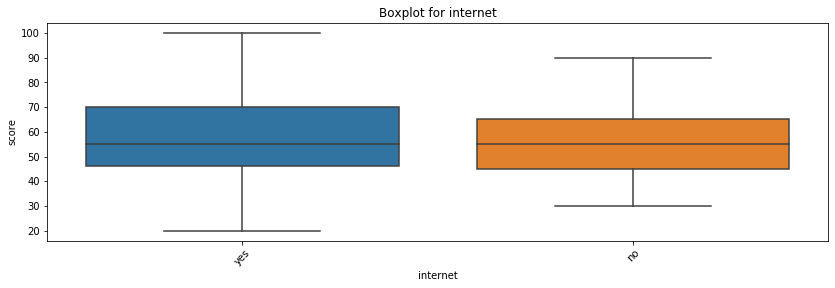

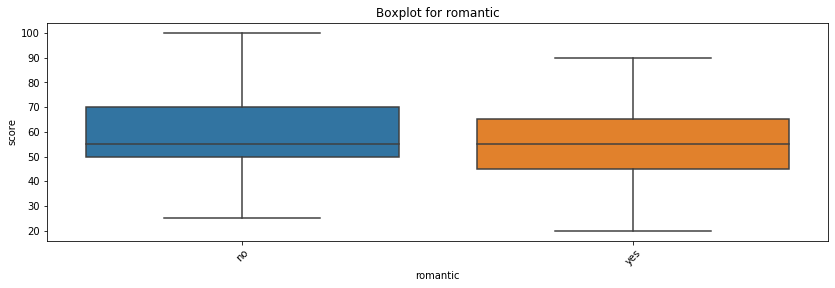

In [35]:
for col in df.columns:
    if df[col].dtypes == 'O':
        get_boxplot(col)

Pstatus, paid, famsize визуально не коррелируют с оценкой, удалим их

In [36]:
df.drop(columns=['Pstatus', 'paid', 'famsize'], inplace=True)

In [37]:
df.shape

(352, 26)

# Выводы

1.	Из 395 строк в исходном датасете в 37-х строках оценка по математике нулевая. Эти строки удалены.
2.	Поле "Studytime, granular" избыточное, полностью коррелирует со Studytime.
3.	Поля Pstatus, paid, famsize слабо связаны со score и исключены из итогового датасета.
4.	Выбросы найдены в полях Medu, Fedu, absences. Устранены.
5.	Наиболее перспективны для анализа поля Mjob, Fjob, schoolsup и количественные поля, оставленные в датасете.